### * One Sample T test
### * one sample and a hypothesised mean
### * Two sample T test
### * How significantly different the two samples are
### * sales in zone one vs two

##### The are two types of two sample T test :
##### Independent t test
##### Ho : meuw1 - meuw2 = 0 | meuw1 - meuw2 <= 0 | meuw1 - meuw2 >= 0
##### Paired T test : 
##### This has to do with before and after data and we are trying to guarge the difference in the before and after of the samples

##### Net promoter scores

Ho : meuw (s1 - s2) == 0

Alternative hypothesis is exactly the oppossite of the null hypothesis

In case of paired t test the respondents should be same in the two samples

In [1]:
# t test
import pandas as pd
import scipy.stats as stats

In [2]:
car = pd.read_csv('data/cars.csv')

avg MPG_City for Sedan is at least 25 mpg

* Ho : meuw(MPG_City) >= 25 mpg
* H1 : meuw(MPG_City) < 25 mpg

In [3]:
from math import sqrt
meuw0 = 25
sample = car.loc[car.Type == 'Sedan','MPG_City']
xbar = sample.mean()
s = sample.std()
n = sample.size
t = (xbar - meuw0)/(s / sqrt(n))

In [4]:
t

-14.968799062037252

In [5]:
pvalue = stats.t.cdf(t, n -1)

In [6]:
pvalue

2.708223474632959e-37

In [7]:
stats.ttest_1samp(sample, meuw0)

Ttest_1sampResult(statistic=-14.96879906203726, pvalue=5.416446949265609e-37)

* P value for a two tail test if the t statistics is -ve = 2 * p value of a left tail test
* p value for a two tail test if t statistics is +ve = 2 * p value of a right tail test

In [8]:
if t < 0:
    p_left = pvalue/2
    p_right = 1 - pvalue/2
else :
    p_right = pvalue/2
    p_left = 1 - pvalue/2

In [9]:
s1 = car.loc[(car.Type == 'Sedan') & (car.Make == 'BMW'),'MPG_City']
s2 = car.loc[(car.Type == 'Sedan') & (car.Make == 'Audi'),'MPG_City']

t,p = stats.ttest_ind(s1,s2)

In [10]:
p/2

0.19240189080126163

# paired t test

MPG_City is less than the mileage for a car on the Highway

In [11]:
sample1 = car['MPG_City']
sample2 = car['MPG_Highway']

In [12]:
t,p = stats.ttest_rel(sample1,sample2)

* H0 : sample1 <= sample2
    
* H1 : sample1 > sample2

In [13]:
t,p

(-71.97930555005338, 6.746680066415452e-241)

In [14]:
p

6.746680066415452e-241

In [15]:
if t < 0:
    p_left = pvalue/2
    p_right = 1 - pvalue/2
else :
    p_right = pvalue/2
    p_left = 1 - pvalue/2

In [16]:
p_right

1.0

# ANOVA (Analysis of Variance)

* for tests that compare multiple samples then the test is ANOVA

* ANOVA Analysis Of Variance | Tests of Means

* H0 : There is no significant difference in the compared samples
* Ha : There is a single pair that has significant difference

### Examples of ANOVA

* gdp of different countries

* sales in different quarters

#### Method

* compute the F statistics for analysis of variance 

* Fstats =  Between group variance / within group variance

In [17]:
s1.append(s2)
s1.index = ['s1']*s1.size
s1['group'] = 's1'
s2['group'] = 's2'
df = s1.append(s2)

In [18]:
import matplotlib.pyplot as plt

H0 : 'Audi' = 'Honda' = 'BMW' = 'Mercedes-Benz'

In [19]:
data = car.loc[car.Make.isin(['Audi','BMW','Honda','Mercedes-Benz']),['Make','MSRP']].reset_index(drop = True)

In [20]:
data.head()

,Make,MSRP
0,Audi,25940.0
1,Audi,35940.0
2,Audi,31840.0
3,Audi,33430.0
4,Audi,34480.0


In [21]:
gm = data.MSRP.mean()


In [22]:
grp_mean = data.groupby('Make').mean().round(2)

In [23]:
grp_var = data.groupby('Make').var()

In [24]:
grp_mean, grp_var

(                   MSRP
 Make                   
 Audi           43307.89
 BMW            43285.25
 Honda          21434.71
 Mercedes-Benz  60656.81,                        MSRP
 Make                       
 Audi           1.831600e+08
 BMW            1.552455e+08
 Honda          2.812965e+07
 Mercedes-Benz  9.307844e+08)

In [25]:
size = data.groupby('Make').count()

In [26]:
size

,MSRP
Make,
Audi,19
BMW,20
Honda,17
Mercedes-Benz,26


In [27]:
deviation = grp_mean - gm

In [28]:
squared_deviation = deviation ** 2

In [29]:
squared_deviation_group = size * squared_deviation

In [30]:
SSBetween = squared_deviation_group.sum().round(2)[0]

In [31]:
SSBetween

15883356009.86

In [32]:
DF_between = len(size) - 1

MSDBetween = SSBetween / DF_between

In [33]:
MSDBetween

5294452003.286667

In [34]:
squared_deviation_w = grp_var * (size - 1)

In [35]:
SSWithin = squared_deviation_w.sum().round(2)[0]

SSWithin

29966231107.11

In [36]:
DF_Within = size.sum()[0] - len(size)

In [37]:
DF_Within

78

In [38]:
MSDWithin = SSWithin / DF_Within

In [39]:
F = MSDBetween / MSDWithin

In [40]:
F

13.781087610926702

In [41]:
(1 - stats.f.cdf(F, dfn = DF_between, dfd = DF_Within))

2.681694505346499e-07

In [42]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
mod = ols('MSRP ~ Make', data = data).fit()
table = sm.stats.anova_lm(mod)
table

,df,sum_sq,mean_sq,F,PR(>F)
Make,3.0,1.588336e+10,5.294452e+09,13.781089,2.681692e-07
Residual,78.0,2.996623e+10,3.841825e+08,NaN,NaN


In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

res = pairwise_tukeyhsd(data.MSRP, data.Make)
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Audi,BMW,-22.6447,0.9,-16508.1552,16462.8658,False
Audi,Honda,-21873.1889,0.0069,-39052.7428,-4693.6349,True
Audi,Mercedes-Benz,17348.913,0.0224,1817.7249,32880.101,True
BMW,Honda,-21850.5441,0.0061,-38826.0724,-4875.0158,True
BMW,Mercedes-Benz,17371.5577,0.0197,2066.3531,32676.7623,True
Honda,Mercedes-Benz,39222.1018,0.001,23171.734,55272.4696,True


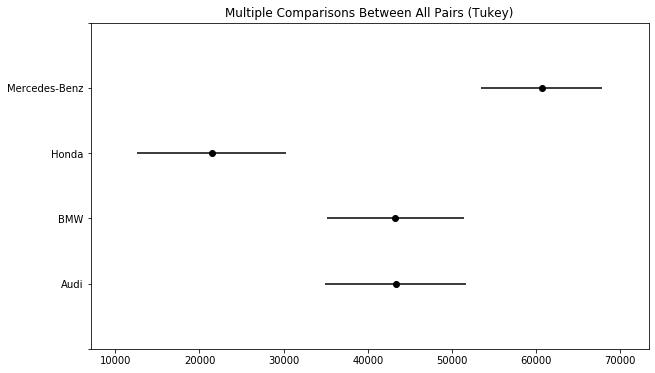

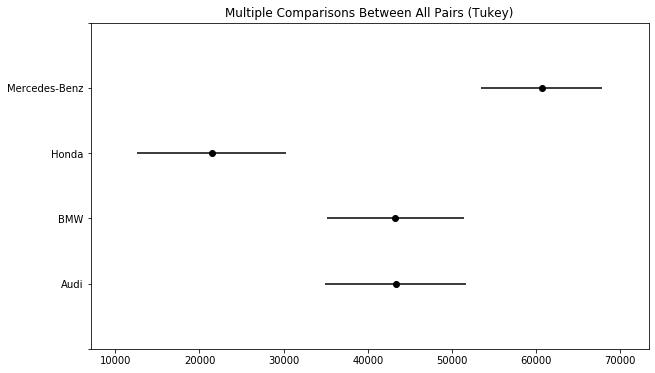

In [44]:
res.plot_simultaneous()

# Chi squared Test

H0 : The two variables are independent of each other

# chi square test of independence

In [45]:
car.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

# Type and Drive train

In [46]:
x = pd.crosstab(car.Type, car.DriveTrain)

In [47]:
x

DriveTrain,All,Front,Rear
Type,,,
Hybrid,0,3,0
SUV,38,22,0
Sedan,28,179,55
Sports,5,8,36
Truck,12,0,12
Wagon,9,14,7


In [48]:
chi_square, p_value, df, expected_frequency = stats.chi2_contingency(x)

In [49]:
p_value

1.5545889945414431e-34

In [50]:
expected_frequency

array([[  0.64485981,   1.58411215,   0.77102804],
       [ 12.89719626,  31.68224299,  15.42056075],
       [ 56.31775701, 138.34579439,  67.3364486 ],
       [ 10.53271028,  25.87383178,  12.59345794],
       [  5.1588785 ,  12.6728972 ,   6.1682243 ],
       [  6.44859813,  15.8411215 ,   7.71028037]])

# correlation

## the covariability of two variables

In [51]:
from sklearn.datasets import load_boston

In [52]:
b_data = load_boston()

In [53]:
b_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [54]:
print(b_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [55]:
df_boston = pd.DataFrame(b_data.data, columns = b_data.feature_names)
df_boston['MEDV'] = b_data.target

In [56]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


covariance = sum[[X - Xbar][Y - Ybar]]/N

correlation = Covariance / (Sx * Sy)

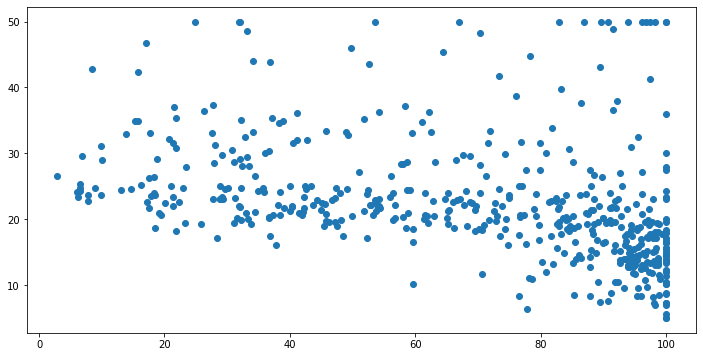

In [59]:
plt.figure(figsize=(12,6))
plt.scatter(df_boston.AGE, df_boston.MEDV)
plt.show()

In [60]:
df_boston.MEDV.corr(df_boston.RM)

0.695359947071539

In [61]:
df_boston.MEDV.corr(df_boston.LSTAT)

-0.7376627261740147

In [62]:
df_boston.MEDV.corr(df_boston.AGE)

-0.376954565004596

In [65]:
c = df_boston.corr()

In [64]:
import seaborn as sns

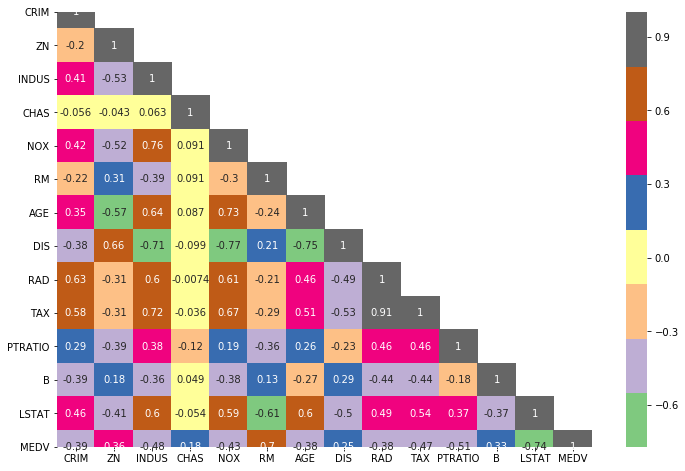

In [71]:
import numpy as np
m = np.ones_like(c)
m[np.tril_indices_from(m)] = 0
plt.figure(figsize=(12,8))

sns.heatmap(c, cmap='Accent', annot = True, mask=m)

plt.show()

regression is trying to build a relationship between X and Y where X is the independent variable and Y the dependent variable

# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression()

In [74]:
x = df_boston[['RM']]
y = df_boston.MEDV

In [75]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lr.coef_

array([9.10210898])

In [77]:
lr.intercept_

-34.67062077643857

In [79]:
lr.score(x,y)

0.4835254559913343

In [80]:
lr.predict(x)

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

In [81]:
mod = ols('MEDV ~ RM', data = df_boston).fit()

In [83]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.49e-74
Time:                        14:27:15   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
ft =' + '.join(df_boston.drop('MEDV', axis = 1).columns)

In [85]:
mod = ols('MEDV ~'+ft, data = df_boston).fit()

In [86]:
ft

'CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [87]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        14:32:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""